# Import modules

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Define a function for displaying misclassified digits

In [3]:
def show_mistakes(y_pred, Y_cv):
    """
    This function displays 5 random misclassified digits after the prediction by a model. 
    Inputs: y_pred: predicted labels np.ndarray
            Y_cv: validation dataset np.ndarray
    Outputs: displays a 5-subplot figure with misclassified digits
    """
    ind = np.array(np.where(y_pred != Y_cv))
    n_mist = ind.size
    ind_rnd = np.random.randint(0, n_mist-1, size=5)

    fig, axes = plt.subplots(1,5, figsize=(20,5))
    for i in range(5):
        axes[i].imshow(np.reshape(np.array(X_cv)[ind[0,i],:], (28,28)), cmap='gray')
        axes[i].set_title("Prediction: {:d}" .format(y_pred[ind[0,i]]))

# Load and visualize image set

In [4]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [5]:
train_data.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10469,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35239,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16242,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
918,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Select and normalize features

In [6]:
X_train = train_data.drop('label', axis=1)/255
Y_train = train_data['label']
X_test = test_data/255

In [7]:
m_train = len(Y_train)
print(m_train)

42000


# Resahpe train and test sets to 2d image formats (28x28)

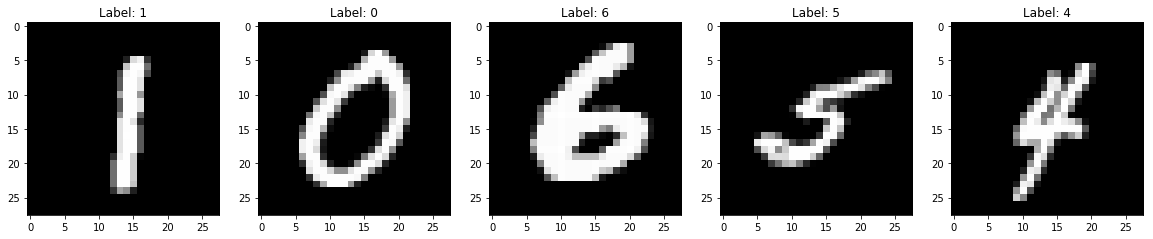

In [8]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
X_train_img = np.array(X_train).reshape((m_train,28,28,1))
X_test_img = np.array(X_test).reshape((m_test,28,28,1))

# Visualize some random images from the training set
ind = np.random.randint(0, m_train-1, size=(5))
fig, axes = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axes[i].imshow(X_train_img[ind[i],:,:,0], cmap='gray')
    axes[i].set_title("Label: {:d}" .format(Y_train[ind[i]]))

# Split train and cross-validation data for later assessment

In [9]:
X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train_img, Y_train, test_size=0.2, random_state=42)

## Convert labels to one-hot vectors

In [11]:
Y_train_ohe = to_categorical(Y_train, num_classes=10)
Y_tr_ohe = to_categorical(Y_tr, num_classes=10)
Y_cv_ohe = to_categorical(Y_cv, num_classes=10)

## Build CNN model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [18]:
def CnnModel():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(Dense(10, activation='softmax'))

    cnn_model.summary()
    return cnn_model

In [19]:
cnn_model_1 = CnnModel()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
__________

In [20]:
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Monitor validation loss to prevent over- and underfitting

In [21]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [22]:
cnn_model_1.fit(X_train_img, Y_train_ohe, validation_split=0.2, epochs=50, batch_size=32, verbose=2, callbacks=[es])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
 - 480s - loss: 0.1455 - acc: 0.9558 - val_loss: 0.0586 - val_acc: 0.9800
Epoch 2/50
 - 430s - loss: 0.0511 - acc: 0.9851 - val_loss: 0.0495 - val_acc: 0.9869
Epoch 3/50
 - 411s - loss: 0.0358 - acc: 0.9888 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 4/50
 - 409s - loss: 0.0288 - acc: 0.9913 - val_loss: 0.0402 - val_acc: 0.9885
Epoch 5/50
 - 405s - loss: 0.0196 - acc: 0.9939 - val_loss: 0.0487 - val_acc: 0.9889
Epoch 6/50
 - 413s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0464 - val_acc: 0.9900
Epoch 7/50
 - 396s - loss: 0.0167 - acc: 0.9952 - val_loss: 0.0516 - val_acc: 0.9890
Epoch 8/50
 - 312s - loss: 0.0141 - acc: 0.9953 - val_loss: 0.0454 - val_acc: 0.9892
Epoch 9/50
 - 279s - loss: 0.0146 - acc: 0.9956 - val_loss: 0.0816 - val_acc: 0.9858


In [23]:
cnn_model.save_weights("cnn_model_1.h5")
print("Model saved to disk")

Model saved to disk


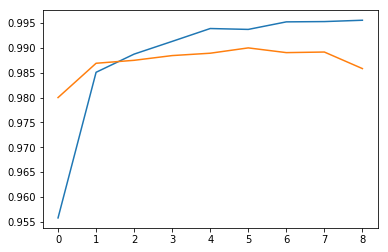

In [25]:
plt.plot(cnn_model_1.history.history["acc"])
plt.plot(cnn_model_1.history.history["val_acc"])
plt.show()

## Check accuracy on validation data

Accuracy =  0.9936904761904762


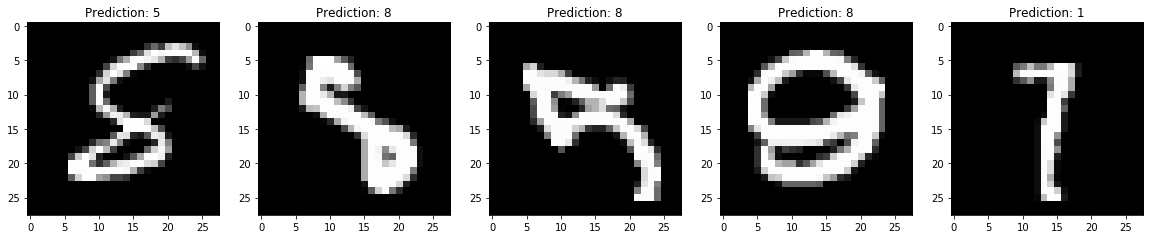

In [26]:
y_pred = np.argmax(cnn_model_1.predict(np.array(X_cv)), axis=1)
acc = np.sum(y_pred==Y_cv)/Y_cv.size
print("Accuracy = ", acc)

show_mistakes(y_pred, Y_cv)

In [27]:
y_test_pred_ohe = cnn_model_1.predict(X_test_img)
y_test_pred = np.argmax(y_test_pred_ohe, axis=1)
submission = pd.DataFrame({"ImageId": np.arange(y_test_pred.size)+1, "label": y_test_pred})
submission.set_index("ImageId", inplace=True)
print(submission.head())
submission.to_csv('submission_MNIST_CNN2.csv')

         label
ImageId       
1            2
2            0
3            9
4            9
5            3


# Data augmentation and early stopping

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [29]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1)

In [30]:
datagen.fit(X_tr)

# Visualize augmented images

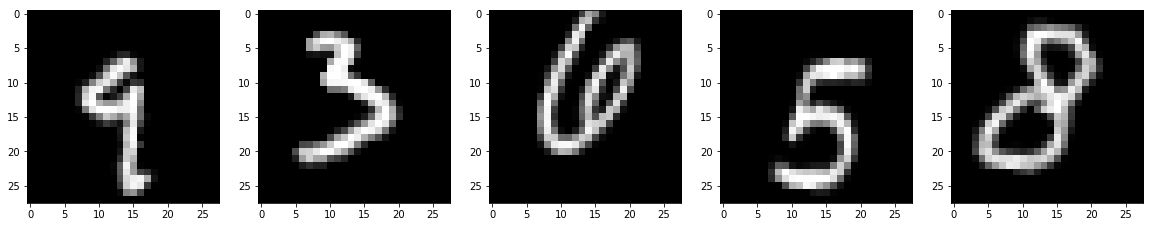

In [43]:
aug_test = datagen.flow(X_tr, Y_tr_ohe, batch_size=5)
fig, axes = plt.subplots(1,5, figsize=(20,5))
for i in range(aug_test[0][0].shape[0]):
    axes[i].imshow(aug_test[0][0][i,:,:,0], cmap='gray')
#    axes[i].set_title("Label: {:d}" .format(np.argmax(aug_test[0][i])))

In [32]:
cnn_model_augm = CnnModel()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
__________

In [44]:
cnn_model_augm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [46]:
cnn_model_augm.fit_generator(datagen.flow(X_tr, Y_tr_ohe, batch_size=32),
                    steps_per_epoch=np.ceil(len(Y_tr_ohe) / 32), epochs=50, validation_data=(X_cv, Y_cv_ohe), callbacks=[es], verbose=2)

Epoch 1/50
 - 353s - loss: 0.0865 - acc: 0.9736 - val_loss: 0.0463 - val_acc: 0.9867
Epoch 2/50
 - 296s - loss: 0.0726 - acc: 0.9781 - val_loss: 0.0673 - val_acc: 0.9821
Epoch 3/50
 - 292s - loss: 0.0689 - acc: 0.9790 - val_loss: 0.0407 - val_acc: 0.9885
Epoch 4/50
 - 313s - loss: 0.0625 - acc: 0.9809 - val_loss: 0.0394 - val_acc: 0.9880
Epoch 5/50
 - 377s - loss: 0.0612 - acc: 0.9823 - val_loss: 0.0416 - val_acc: 0.9882
Epoch 6/50
 - 359s - loss: 0.0572 - acc: 0.9833 - val_loss: 0.0323 - val_acc: 0.9910
Epoch 7/50
 - 367s - loss: 0.0534 - acc: 0.9841 - val_loss: 0.0408 - val_acc: 0.9881
Epoch 8/50
 - 346s - loss: 0.0491 - acc: 0.9850 - val_loss: 0.0523 - val_acc: 0.9877
Epoch 9/50
 - 422s - loss: 0.0506 - acc: 0.9854 - val_loss: 0.0346 - val_acc: 0.9915
Epoch 10/50
 - 399s - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0289 - val_acc: 0.9919
Epoch 11/50
 - 372s - loss: 0.0458 - acc: 0.9862 - val_loss: 0.0319 - val_acc: 0.9905
Epoch 12/50
 - 359s - loss: 0.0430 - acc: 0.9868 - val_loss: 0.

Accuracy =  0.9925


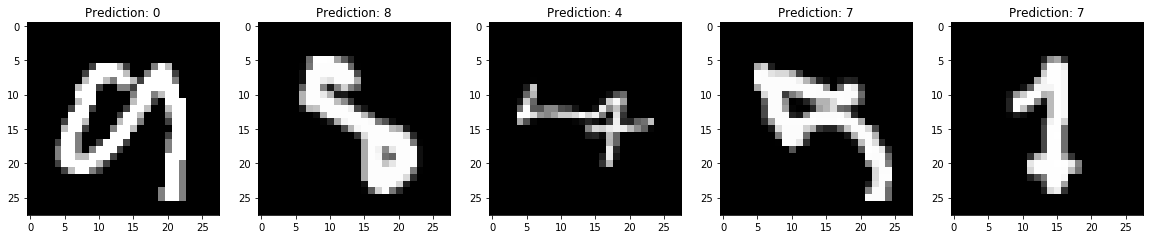

In [48]:
y_pred = np.argmax(cnn_model_augm.predict(np.array(X_cv)), axis=1)
acc = np.sum(y_pred==Y_cv)/Y_cv.size
print("Accuracy = ", acc)

show_mistakes(y_pred, Y_cv)

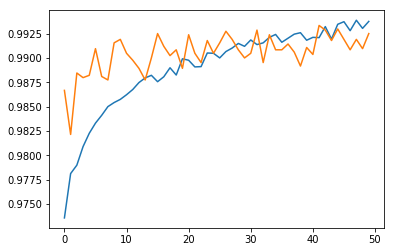

In [49]:
plt.plot(cnn_model_augm.history.history["acc"])
plt.plot(cnn_model_augm.history.history["val_acc"])
plt.show()

In [50]:
y_test_pred_ohe = cnn_model_augm.predict(X_test_img)
y_test_pred = np.argmax(y_test_pred_ohe, axis=1)
submission = pd.DataFrame({"ImageId": np.arange(y_test_pred.size)+1, "label": y_test_pred})
submission.set_index("ImageId", inplace=True)
print(submission.head())
submission.to_csv('submission_MNIST_CNN3.csv')

         label
ImageId       
1            2
2            0
3            9
4            0
5            3


### Save model weights

In [51]:
cnn_model_augm.save_weights("cnn_model_augm.h5")
print("Model saved to disk")

Model saved to disk
